In [3]:
# Importing libraries
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

import pandas as pd

In [10]:
aviation_data = r'/Users/robertreynoso/Desktop/phase_03_project/data/clean_aviation_data_2.csv'

data = pd.read_csv(aviation_data, encoding='latin-1')

viz_aviation_data = r'/Users/robertreynoso/Desktop/phase_03_project/data/viz_aviation_data.csv'

data_2 = pd.read_csv(viz_aviation_data, encoding='latin-1')

Outlier Analysis - Boxplot


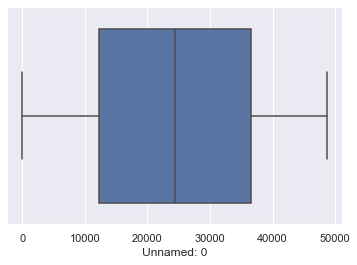

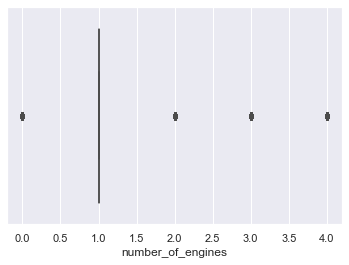

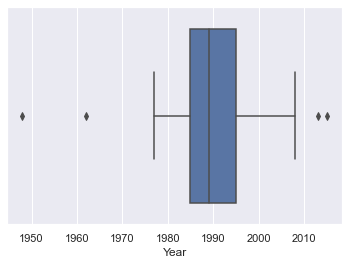

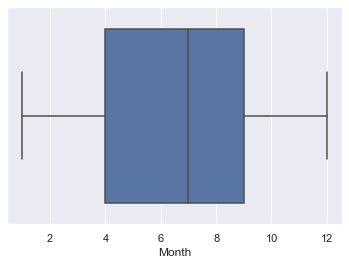

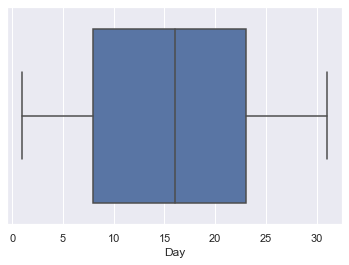

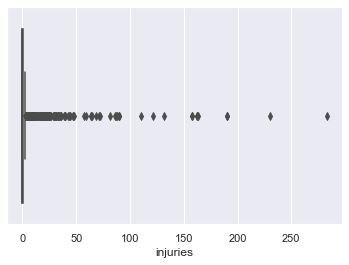

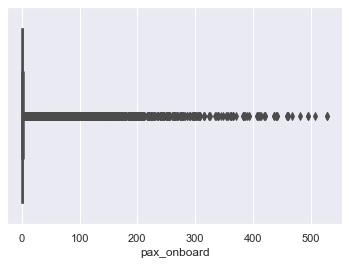

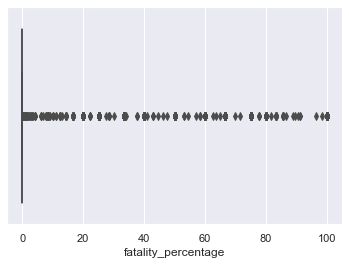

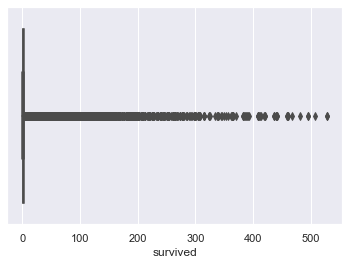

Distribution Analysis - Histogram


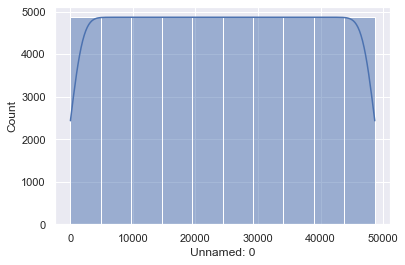

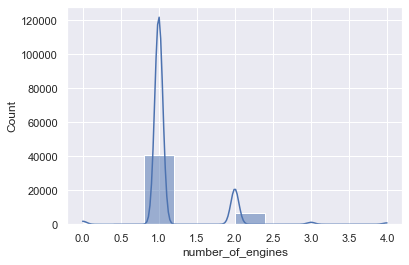

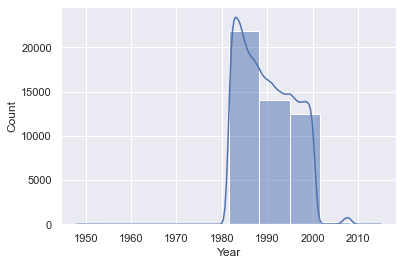

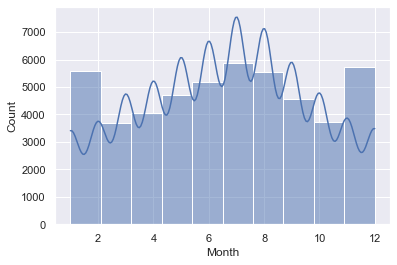

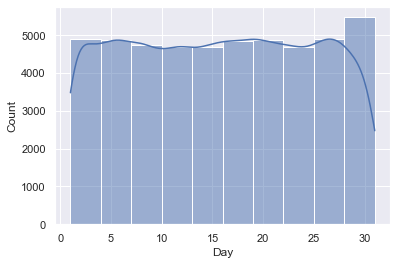

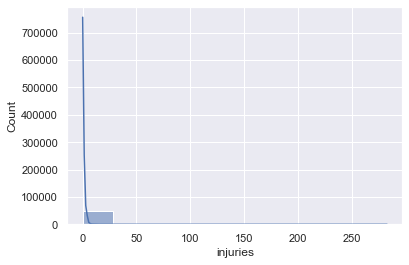

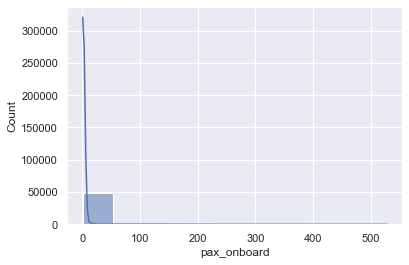

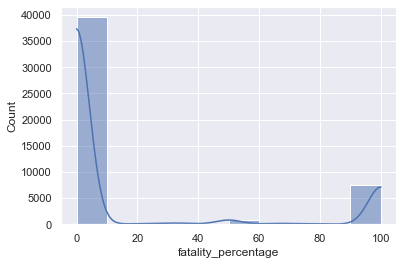

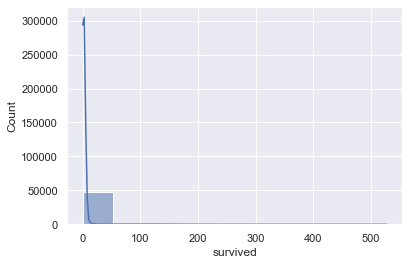

In [11]:
eda_num(data_2)

In [ ]:
#select which column to visualize
eda_num(data[['column_1', 'columns_2', 'column_n']])

In [7]:
eda_num(data, method="correlation")


Correlation Analysis - Heatmap


,Unnamed: 0,number_of_engines,Year,Month,Day,injuries,pax_onboard,fatality_percentage,survived
Unnamed: 0,1.00,-0.07,-0.06,0.01,-0.00,-0.02,-0.08,0.02,-0.08
number_of_engines,-0.07,1.00,0.02,-0.02,-0.00,0.12,0.44,0.03,0.43
Year,-0.06,0.02,1.00,0.01,-0.00,0.01,0.02,0.01,0.02
Month,0.01,-0.02,0.01,1.00,-0.02,0.01,-0.00,0.02,-0.00
Day,-0.00,-0.00,-0.00,-0.02,1.00,0.00,-0.00,-0.00,-0.00
injuries,-0.02,0.12,0.01,0.01,0.00,1.00,0.23,0.18,0.16
pax_onboard,-0.08,0.44,0.02,-0.00,-0.00,0.23,1.00,-0.05,1.00
fatality_percentage,0.02,0.03,0.01,0.02,-0.00,0.18,-0.05,1.00,-0.09
survived,-0.08,0.43,0.02,-0.00,-0.00,0.16,1.00,-0.09,1.00


In [8]:
data.columns

Index(['Unnamed: 0', 'location', 'injury_severity', 'aircraft_damage', 'make',
       'model', 'number_of_engines', 'engine_type', 'weather_conditions',
       'phase_of_flight', 'Year', 'Month', 'Day', 'injuries', 'pax_onboard',
       'fatality_percentage', 'survived', 'AmateurBuilt'],
      dtype='object')

Bar Plot of aircraft_damage


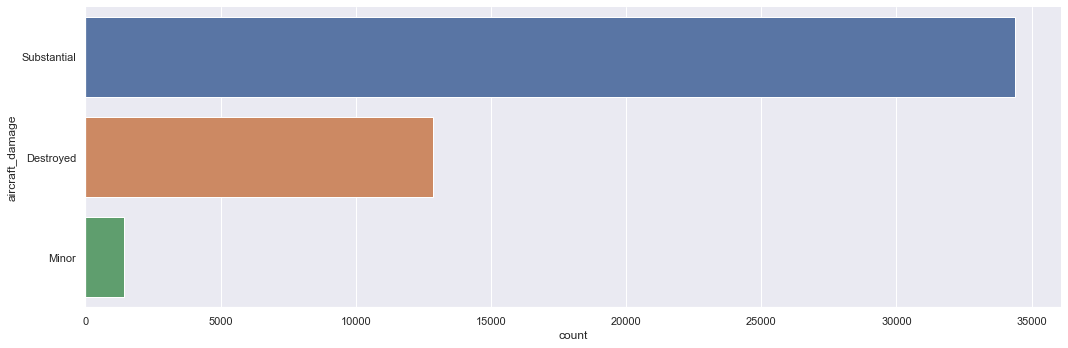

Summary of aircraft_damage


,count,relative_pct
Substantial,34378,0.71
Destroyed,12873,0.26
Minor,1420,0.03


In [9]:
eda_cat(data, x='aircraft_damage')


Bar Plot of phase_of_flight with respect to target


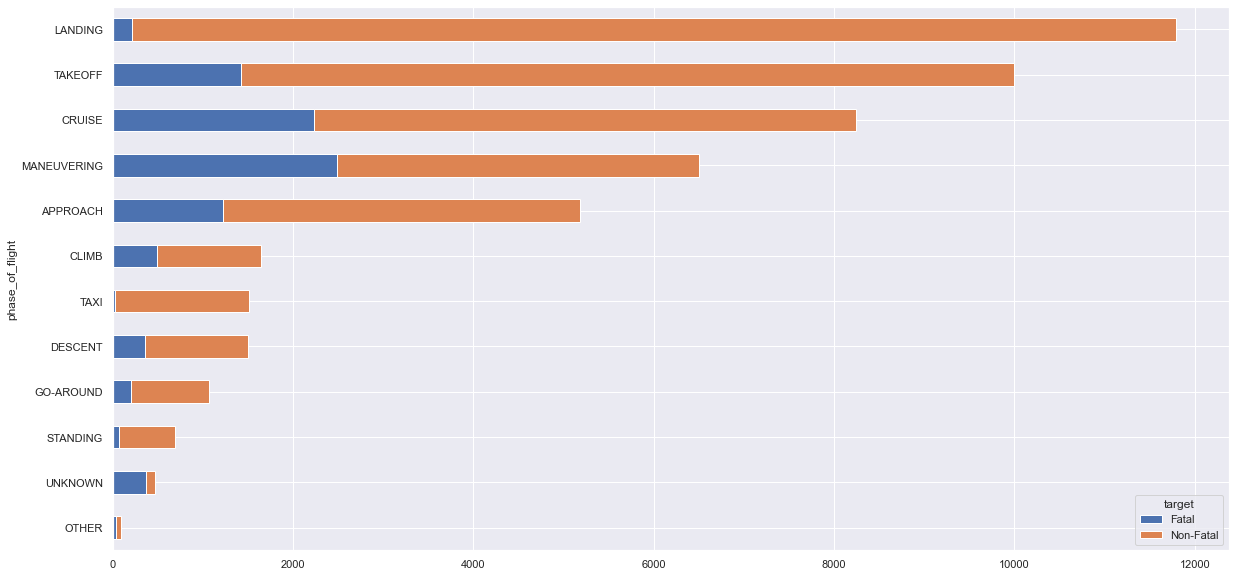

Crosstabulation of phase_of_flight across target


target,Fatal,Non-Fatal
phase_of_flight,,
LANDING,0.02,0.98
TAKEOFF,0.14,0.86
CRUISE,0.27,0.73
MANEUVERING,0.38,0.62
APPROACH,0.24,0.76
CLIMB,0.30,0.70
TAXI,0.02,0.98
DESCENT,0.24,0.76
GO-AROUND,0.19,0.81


In [15]:
eda_cat(data_2, x='phase_of_flight', y='target')


In [13]:
data_2.columns

Index(['Unnamed: 0', 'target', 'location', 'aircraft_damage', 'make', 'model',
       'number_of_engines', 'engine_type', 'weather_conditions',
       'phase_of_flight', 'Year', 'Month', 'Day', 'injuries', 'pax_onboard',
       'fatality_percentage', 'survived', 'amateur_built'],
      dtype='object')